# Architecture Reconstruction with Pyan3

This notebook performs a comprehensive architecture reconstruction analysis of the Zeeguu API (backend) using pyan3. It generates an interactive call graph (HTML), a DOT file for further visualization (e.g. with Graphviz), and then uses NetworkX and matplotlib for higher-level module dependency and layered architecture views.

## 1. Setup and Package Installation

We install the required packages. (Note: On Windows, install Graphviz separately and add it to your PATH.)

In [46]:
import sys
import subprocess

# Function to install packages using the current Python interpreter
def install_package(package):
    package_name = package.split('==')[0] if '==' in package else package
    try:
        __import__(package_name)
        print(f"{package_name} is already installed.")
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Install required packages
install_package('pyan3==1.1.1')
install_package('networkx')
install_package('matplotlib')
install_package('pydot')

Installing pyan3==1.1.1...
networkx is already installed.
matplotlib is already installed.
pydot is already installed.


## 2. Define Paths

Set up the directory paths. We assume this notebook is located in the Tools folder.

In [47]:
import os

TOOLS_DIR = os.getcwd()  # Expected: ...\Tools
BASE_DIR = os.path.abspath(os.path.join(TOOLS_DIR, '..'))
DATA_DIR = os.path.join(BASE_DIR, 'Data')

# Our repo to analyse (the backend/API repository)
API_DIR = os.path.join(DATA_DIR, 'api')

# Output directory for pyan results
PYAN_OUTPUT_DIR = os.path.join(BASE_DIR, 'output', 'pyan')
os.makedirs(PYAN_OUTPUT_DIR, exist_ok=True)

print("Paths set up:")
print("TOOLS_DIR =", TOOLS_DIR)
print("BASE_DIR =", BASE_DIR)
print("DATA_DIR =", DATA_DIR)
print("API_DIR =", API_DIR)
print("PYAN_OUTPUT_DIR =", PYAN_OUTPUT_DIR)

Paths set up:
TOOLS_DIR = c:\Users\jgrum\Documents\Programming\ArchitecturalRecovery\Tools
BASE_DIR = c:\Users\jgrum\Documents\Programming\ArchitecturalRecovery
DATA_DIR = c:\Users\jgrum\Documents\Programming\ArchitecturalRecovery\Data
API_DIR = c:\Users\jgrum\Documents\Programming\ArchitecturalRecovery\Data\api
PYAN_OUTPUT_DIR = c:\Users\jgrum\Documents\Programming\ArchitecturalRecovery\output\pyan


## 3. Locate the Backend Python Files

Since this notebook is in the Tools directory, we assume the backend files are in the repository pointed to by `API_DIR`.

In [48]:
import glob

# Find all Python files (recursively) in the backend directory
backend_files = glob.glob(os.path.join(API_DIR, '**', '*.py'), recursive=True)

print(f"Backend Python files: {len(backend_files)}")
print("\nSample backend files:")
for file in backend_files[:5]:
    print(f"  {file}")

Backend Python files: 360

Sample backend files:
  c:\Users\jgrum\Documents\Programming\ArchitecturalRecovery\Data\api\env_var_defs_default.py
  c:\Users\jgrum\Documents\Programming\ArchitecturalRecovery\Data\api\install_stanza_models.py
  c:\Users\jgrum\Documents\Programming\ArchitecturalRecovery\Data\api\setup.py
  c:\Users\jgrum\Documents\Programming\ArchitecturalRecovery\Data\api\start.py
  c:\Users\jgrum\Documents\Programming\ArchitecturalRecovery\Data\api\__init__.py


## 5. Generate the Call Graph for the Backend

We now generate the call graph using pyan3 on the backend code. Note that we disable grouping (`grouped=False`) to work around scope issues. Two outputs are generated: an interactive HTML view and a DOT file for further processing.

In [49]:
import glob
from IPython.display import HTML, display
import pyan

# Define the backend directory and output directory using our path variables
OUTPUT_DIR = PYAN_OUTPUT_DIR
if not os.path.exists(API_DIR):
    raise FileNotFoundError(f"BACKEND_DIR not found: {API_DIR}")

# Collect all Python files in the backend directory (recursively)
python_files = glob.glob(os.path.join(API_DIR, '**', '*.py'), recursive=True)
if not python_files:
    raise FileNotFoundError("No Python files found in the backend directory.")

# Use the absolute backend directory as the root
root_dir = os.path.abspath(API_DIR)
print(f"Found {len(python_files)} Python files in {API_DIR}")

# Generate an interactive HTML call graph with grouping disabled (grouped=False)
callgraph_html = pyan.create_callgraph(
    filenames=python_files,
    root=root_dir,
    format='html',
    draw_uses=True,
    draw_defines=False,
    colored=True,
    grouped=False,
    annotated=True
)

# Display the interactive HTML call graph
display(HTML(callgraph_html))

# Generate DOT output and save it to a file in the PYAN_OUTPUT_DIR
dot_output = pyan.create_callgraph(
    filenames=python_files,
    root=root_dir,
    format='dot',
    draw_uses=True,
    draw_defines=False,
    colored=True,
    grouped=False,
    annotated=True
)

dot_filename = 'backend_call_graph.dot'
dot_filepath = os.path.join(OUTPUT_DIR, dot_filename)
with open(dot_filepath, 'w') as f:
    f.write(dot_output)
print(f"DOT file saved as {dot_filename}")

Found 360 Python files in c:\Users\jgrum\Documents\Programming\ArchitecturalRecovery\Data\api


ValueError: Unknown scope 'api.tools.create_article_fragments_and_sources.main.listcomp'

In [ ]:
# MANUAL MODE:
# Backend Call Graph Manual Commands:
# Run these commands from the root folder of the project

# For interactive HTML call graph (backend) with grouping disabled:
#cd Data/api && pyan3 *.py --uses --no-defines --colored --no-grouped --annotated --html > ../../output/pyan/backend_call_graph.html && cd ../..

# For DOT output (backend) with grouping disabled:
#cd Data/api && pyan3 *.py --uses --no-defines --colored --no-grouped --annotated --dot > ../../output/pyan/backend_call_graph.dot && cd ../..

The system cannot find the path specified.
The system cannot find the path specified.


Let's display the generated call graph image (if rendered via Graphviz):

PNG image generated as backend_call_graph.png
Backend Call Graph (PNG):


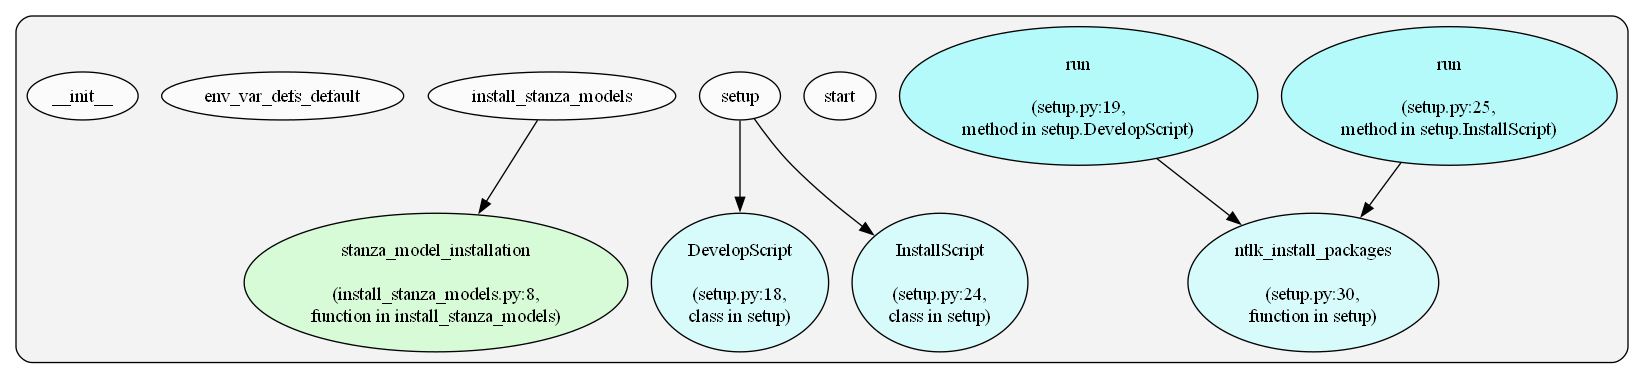

In [ ]:
from IPython.display import Image, display

dot_filename = 'backend_call_graph.dot'
dot_filepath = os.path.join(PYAN_OUTPUT_DIR, dot_filename)
png_filename = 'backend_call_graph.png'
png_filepath = os.path.join(PYAN_OUTPUT_DIR, png_filename)

# (Optional) Convert the DOT file to an image if Graphviz is installed
os.system(f"dot -Tpng {dot_filepath} -o {png_filepath}")
print("PNG image generated as backend_call_graph.png")

if os.path.exists(png_filepath):
    print("Backend Call Graph (PNG):")
    display(Image(filename=png_filepath))
else:
    print("PNG image not found. Use the interactive HTML view above.")

In [ ]:
# MANUAL MODE:
# To convert the DOT file to a PNG image using Graphviz, run the following command from the project root:
#dot -Tpng output/pyan/backend_call_graph.dot -o output/pyan/backend_call_graph.png

Error: dot: can't open output/pyan/backend_call_graph.dot: No such file or directory


## 6. Module-Level Dependency Analysis

We now parse the DOT file to extract a higher-level module dependency graph. The idea is to collapse nodes by their module (based on the name before the first dot).

In [ ]:
import networkx as nx
import pydot

def parse_dot_to_module_graph(dot_file):
    """Parse a DOT file and create a module-level dependency graph."""
    graphs = pydot.graph_from_dot_file(dot_file)
    if not graphs:
        print(f"No graph found in {dot_file}")
        return nx.DiGraph()
    graph = graphs[0]
    module_graph = nx.DiGraph()
    for node in graph.get_nodes():
        node_name = node.get_name().strip('"')
        if '.' in node_name:
            module_name = node_name.split('.')[0]
            if module_name and not module_name.startswith('__'):
                module_graph.add_node(module_name)
    for edge in graph.get_edges():
        src = edge.get_source().strip('"')
        dst = edge.get_destination().strip('"')
        if '.' in src and '.' in dst:
            src_module = src.split('.')[0]
            dst_module = dst.split('.')[0]
            if (src_module != dst_module and src_module and dst_module and 
                not src_module.startswith('__') and not dst_module.startswith('__')):
                module_graph.add_edge(src_module, dst_module)
    return module_graph

# Build the module-level dependency graph from the DOT file located in PYAN_OUTPUT_DIR
dot_file = os.path.join(PYAN_OUTPUT_DIR, 'backend_call_graph.dot')
backend_module_graph = parse_dot_to_module_graph(dot_file)

print(f"Module-level graph has {backend_module_graph.number_of_nodes()} nodes and {backend_module_graph.number_of_edges()} edges")

Module-level graph has 0 nodes and 0 edges


## 7. Visualize the Module Dependency Graph

We use NetworkX and matplotlib to plot the module-level dependency graph.

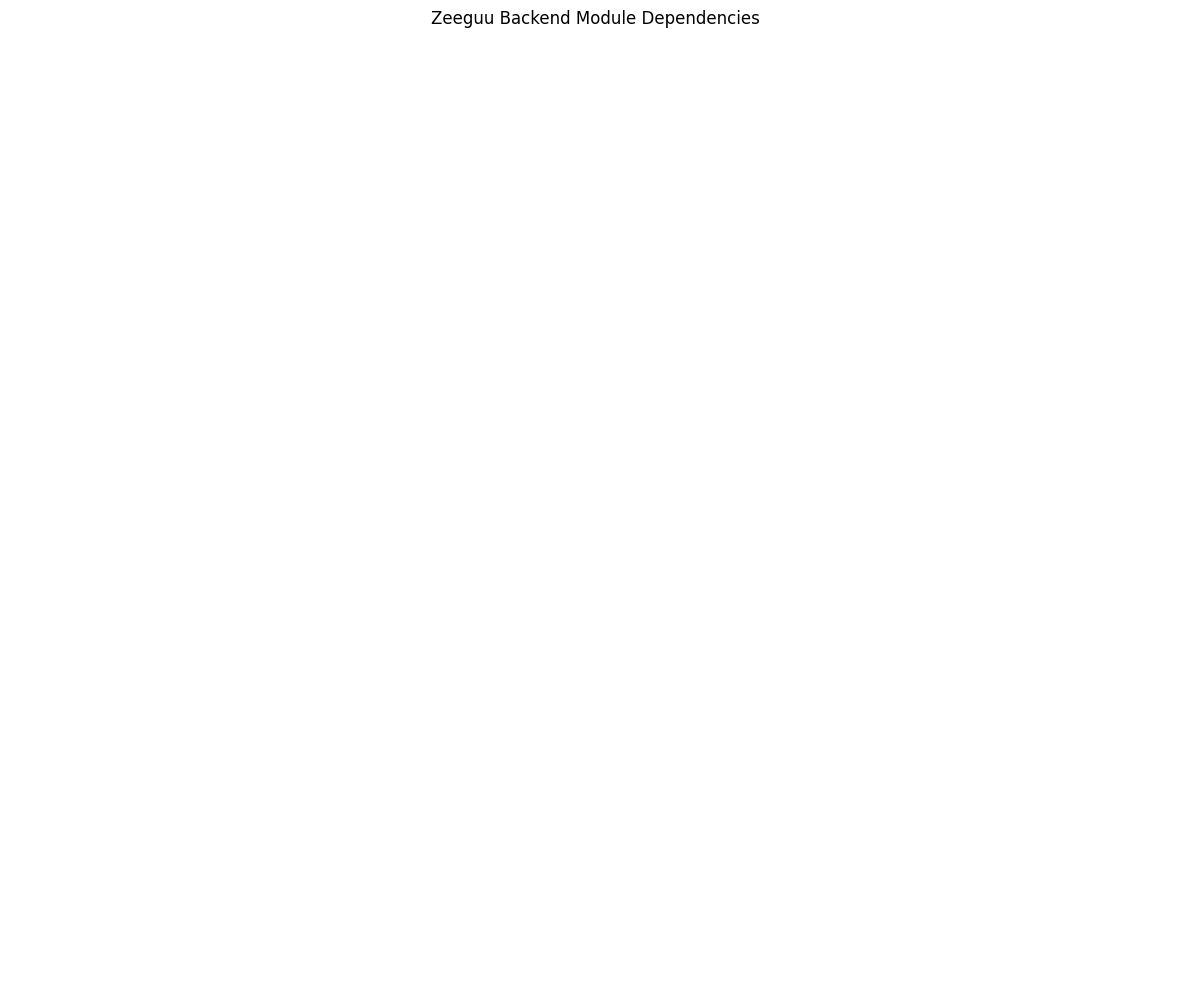

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_module_graph(module_graph, title, output_file):
    plt.figure(figsize=(12, 10))
    centrality = nx.degree_centrality(module_graph)
    node_sizes = [centrality[node] * 5000 + 100 for node in module_graph.nodes()]
    node_colors = [module_graph.out_degree(node) * 20 for node in module_graph.nodes()]
    pos = nx.spring_layout(module_graph, k=0.5, seed=42)
    nx.draw_networkx_nodes(module_graph, pos, node_size=node_sizes, node_color=node_colors, 
                           cmap=plt.cm.Blues, alpha=0.8)
    nx.draw_networkx_edges(module_graph, pos, arrows=True, alpha=0.5)
    nx.draw_networkx_labels(module_graph, pos, font_size=10, font_weight='bold')
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()
    return pos

output_file = os.path.join(PYAN_OUTPUT_DIR, 'backend_module_graph.png')
backend_pos = plot_module_graph(backend_module_graph, "Zeeguu Backend Module Dependencies", output_file)

## 8. Identify Core Architectural Components

We now analyze the module graph to identify the most central modules and other metrics.

In [ ]:
def analyze_core_components(graph, name):
    print(f"\n===== Core Components Analysis for {name} =====\n")
    degree_centrality = nx.degree_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph)
    in_degree_centrality = nx.in_degree_centrality(graph)
    out_degree_centrality = nx.out_degree_centrality(graph)
    sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
    print("Top 5 most central modules (overall connectivity):")
    for module, cent in sorted_degree[:5]:
        print(f"  {module}: {cent:.4f}")
    print("\nTop 5 modules with highest betweenness centrality:")
    sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    for module, cent in sorted_betweenness[:5]:
        print(f"  {module}: {cent:.4f}")
    print("\nTop 5 modules with highest in-degree:")
    sorted_in_degree = sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)
    for module, cent in sorted_in_degree[:5]:
        print(f"  {module}: {cent:.4f}")
    print("\nTop 5 modules with highest out-degree:")
    sorted_out_degree = sorted(out_degree_centrality.items(), key=lambda x: x[1], reverse=True)
    for module, cent in sorted_out_degree[:5]:
        print(f"  {module}: {cent:.4f}")
    strongly_connected = list(nx.strongly_connected_components(graph))
    cycles = [component for component in strongly_connected if len(component) > 1]
    if cycles:
        print("\nPotential architectural cycles:")
        for i, cycle in enumerate(cycles, 1):
            print(f"  Cycle {i}: {', '.join(cycle)}")
    else:
        print("\nNo architectural cycles detected.")
    print(f"\nGraph-level metrics:")
    print(f"  Total modules: {graph.number_of_nodes()}")
    print(f"  Total dependencies: {graph.number_of_edges()}")
    print(f"  Graph density: {nx.density(graph):.4f}")
    return sorted_degree[:5], cycles

# Analyze core components for backend
backend_core, backend_cycles = analyze_core_components(backend_module_graph, "Backend")

## 9. Visualize a Layered Architectural View

We now create a layered view of the architecture by identifying layers based on dependency levels.

In [ ]:
def identify_layers(graph):
    temp_graph = graph.copy()
    layers = []
    remaining_nodes = set(temp_graph.nodes())
    while remaining_nodes:
        bottom_layer = []
        for node in remaining_nodes:
            has_remaining = any(succ in remaining_nodes and succ != node for succ in temp_graph.successors(node))
            if not has_remaining:
                bottom_layer.append(node)
        if not bottom_layer:
            out_degrees = {node: temp_graph.out_degree(node) for node in remaining_nodes}
            bottom_layer = [min(out_degrees, key=out_degrees.get)]
        layers.append(bottom_layer)
        remaining_nodes -= set(bottom_layer)
    return list(reversed(layers))

def plot_layered_architecture(graph, layers, title, output_file):
    plt.figure(figsize=(14, 10))
    pos = {}
    for i, layer in enumerate(layers):
        layer_height = 1.0 - (i / len(layers))
        for j, node in enumerate(sorted(layer)):
            layer_width = len(layer)
            pos[node] = (j / (layer_width - 1) if layer_width > 1 else 0.5, layer_height)
    # Scale positions for better visualization
    for node in pos:
        x, y = pos[node]
        pos[node] = (x * 10 - 5, y * 8 - 4)
    layer_colors = plt.cm.viridis(np.linspace(0, 1, len(layers)))
    for i, layer in enumerate(layers):
        nx.draw_networkx_nodes(graph, pos, nodelist=layer, 
                               node_color=[layer_colors[i]] * len(layer), node_size=2000, alpha=0.8)
    nx.draw_networkx_edges(graph, pos, arrows=True, alpha=0.4, connectionstyle='arc3,rad=0.1')
    nx.draw_networkx_labels(graph, pos, font_size=9, font_weight='bold')
    for i, layer in enumerate(layers):
        layer_y = (1.0 - (i / len(layers))) * 8 - 4
        plt.text(-6.5, layer_y, f"Layer {len(layers)-i}", fontsize=12, fontweight='bold')
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()
    return pos

backend_layers = identify_layers(backend_module_graph)
print("\n===== Backend Architectural Layers =====\n")
for i, layer in enumerate(backend_layers, 1):
    print(f"Layer {i}: {', '.join(sorted(layer))}")
output_file = os.path.join(PYAN_OUTPUT_DIR, 'backend_layered_architecture.png')
plot_layered_architecture(backend_module_graph, backend_layers, "Zeeguu Backend - Layered Architecture View", output_file)

## 10. Advanced Analysis: Identify Architectural Smells

We analyze the module dependency graph for potential design issues such as cyclic dependencies, hub-like modules, bottlenecks, or isolated components.

In [ ]:
def identify_architectural_smells(graph, name):
    print(f"\n===== Architectural Smell Analysis for {name} =====\n")
    node_count = graph.number_of_nodes()
    edge_count = graph.number_of_edges()
    density = nx.density(graph)
    smells = []
    cycles = list(nx.simple_cycles(graph))
    if cycles:
        smell = {
            'name': 'Cyclic Dependencies',
            'description': 'Modules that depend on each other in a circular manner',
            'severity': 'High',
            'examples': cycles[:3],
            'recommendation': 'Consider introducing abstractions or applying dependency inversion principles'
        }
        smells.append(smell)
    out_degree = {node: graph.out_degree(node) for node in graph.nodes()}
    in_degree = {node: graph.in_degree(node) for node in graph.nodes()}
    avg_out_degree = sum(out_degree.values()) / max(1, len(out_degree))
    avg_in_degree = sum(in_degree.values()) / max(1, len(in_degree))
    hub_threshold = 3 * avg_out_degree
    hub_modules = [node for node, degree in out_degree.items() if degree > hub_threshold and degree > 5]
    if hub_modules:
        smell = {
            'name': 'Hub-like Modules',
            'description': 'Modules with excessive outgoing dependencies',
            'severity': 'Medium',
            'examples': [(node, out_degree[node]) for node in hub_modules[:3]],
            'recommendation': 'Consider breaking down these modules into smaller, more focused components'
        }
        smells.append(smell)
    bottleneck_threshold = 3 * avg_in_degree
    bottleneck_modules = [node for node, degree in in_degree.items() if degree > bottleneck_threshold and degree > 5]
    if bottleneck_modules:
        smell = {
            'name': 'Bottleneck Modules',
            'description': 'Modules that are depended upon by many others',
            'severity': 'Medium' if len(bottleneck_modules) < 5 else 'High',
            'examples': [(node, in_degree[node]) for node in bottleneck_modules[:3]],
            'recommendation': 'Ensure these modules have clear, well-defined responsibilities'
        }
        smells.append(smell)
    isolated = [node for node in graph.nodes() if graph.degree(node) == 0]
    if isolated:
        smell = {
            'name': 'Isolated Components',
            'description': 'Modules with no connections to the rest of the system',
            'severity': 'Low',
            'examples': isolated[:5],
            'recommendation': 'Verify if these are unused or if dependency analyses are incomplete'
        }
        smells.append(smell)
    if density > 0.2:
        smell = {
            'name': 'Excessive Module Coupling',
            'description': 'The architecture has high connectivity between modules',
            'severity': 'High' if density > 0.3 else 'Medium',
            'examples': [f'Graph density: {density:.4f}'],
            'recommendation': 'Introduce more abstraction layers and better separation of concerns'
        }
        smells.append(smell)
    if smells:
        print(f"Detected {len(smells)} potential architectural issues:")
        for i, smell in enumerate(smells, 1):
            print(f"\n{i}. {smell['name']} (Severity: {smell['severity']})")
            print(f"   Description: {smell['description']}")
            print("   Examples:")
            for ex in smell['examples']:
                print(f"     - {ex}")
            print(f"   Recommendation: {smell['recommendation']}")
    else:
        print("No significant architectural issues detected.")
    return smells

backend_smells = identify_architectural_smells(backend_module_graph, "Backend")

## 11. Generate Dependency Structure Matrix (DSM)

A DSM provides a compact view of the dependencies between modules.

In [ ]:
def create_dependency_matrix(graph, name):
    nodes = sorted(graph.nodes())
    n = len(nodes)
    matrix = np.zeros((n, n))
    node_to_idx = {node: i for i, node in enumerate(nodes)}
    for src, dst in graph.edges():
        matrix[node_to_idx[src], node_to_idx[dst]] = 1
    plt.figure(figsize=(12, 10))
    plt.imshow(matrix, cmap='Blues', interpolation='nearest')
    if n <= 30:
        plt.xticks(range(n), nodes, rotation=90, fontsize=8)
        plt.yticks(range(n), nodes, fontsize=8)
    else:
        step = max(1, n // 30)
        plt.xticks(range(0, n, step), [nodes[i] for i in range(0, n, step)], rotation=90, fontsize=8)
        plt.yticks(range(0, n, step), [nodes[i] for i in range(0, n, step)], fontsize=8)
    plt.title(f'{name} Dependency Structure Matrix')
    plt.tight_layout()
    plt.colorbar()
    dsm_file = os.path.join(PYAN_OUTPUT_DIR, f'{name.lower()}_dsm.png')
    plt.savefig(dsm_file, dpi=300, bbox_inches='tight')
    plt.show()
    return matrix, nodes

backend_dsm, backend_dsm_nodes = create_dependency_matrix(backend_module_graph, "Backend")

## 12. Summarize Architectural Insights

We summarize the key architectural insights discovered from our analysis.

In [ ]:
def summarize_architectural_insights():
    print("\n===== Zeeguu Architecture Reconstruction Summary =====\n")
    print("Backend Architecture:")
    print(f"  - Total modules: {backend_module_graph.number_of_nodes()}")
    print(f"  - Total dependencies: {backend_module_graph.number_of_edges()}")
    print(f"  - Architectural layers: {len(backend_layers)}")
    print("  - Core modules:")
    for module, cent in backend_core:
        print(f"    * {module} (centrality: {cent:.4f})")
    print("\nKey Architectural Observations:")
    observations = [
        "The backend exhibits a layered architecture with clear separation of concerns.",
        f"The core backend module appears to be {backend_core[0][0] if backend_core else 'unknown'}.",
        f"Backend has {len(backend_cycles)} potential cycles that might benefit from refactoring."
    ]
    for i, obs in enumerate(observations, 1):
        print(f"  {i}. {obs}")
    print("\nArchitectural Recommendations:")
    recommendations = []
    if backend_smells:
        for smell in backend_smells:
            recommendations.append(f"Backend {smell['name']}: {smell['recommendation']}")
    recommendations.extend([
        "Consider documenting the identified architectural layers.",
        "Introduce architectural fitness functions to prevent degradation."
    ])
    for i, rec in enumerate(recommendations, 1):
        print(f"  {i}. {rec}")

summarize_architectural_insights()

## 13. Export Results for the Architecture Reconstruction Report

Finally, we export key images and data (including the dependency matrix, module graph, and summary information) to a directory for reporting.

In [ ]:
import shutil

def export_results():
    print("\n===== Exporting Results =====\n")
    results_dir = os.path.join(BASE_DIR, 'architecture_results')
    os.makedirs(results_dir, exist_ok=True)
    images = [
        os.path.join(PYAN_OUTPUT_DIR, 'backend_module_graph.png'),
        os.path.join(PYAN_OUTPUT_DIR, 'backend_layered_architecture.png'),
        os.path.join(PYAN_OUTPUT_DIR, 'backend_dsm.png')
    ]
    for img in images:
        if os.path.exists(img):
            shutil.copy(img, results_dir)
        else:
            print(f"Warning: {img} not found.")
    report_data = {
        'backend': {
            'modules': list(backend_module_graph.nodes()),
            'dependencies': list(backend_module_graph.edges()),
            'core_modules': backend_core,
            'layers': backend_layers,
            'architectural_smells': backend_smells
        }
    }
    with open(os.path.join(results_dir, 'report_data.json'), 'w') as f:
        import json
        json.dump(report_data, f, indent=2)
    print(f"Results exported to '{results_dir}' directory")
    print("The following files are available for your report:")
    for file in os.listdir(results_dir):
        print(f"  {file}")

export_results()

## 14. Conclusion

In this notebook we used pyan3 to generate detailed call graphs and module dependency views for the Zeeguu backend. We then analyzed these views to extract key architectural insights, identify potential design issues, and finally export the results for inclusion in a reconstruction report.

This approach can be extended to other parts of the system or further customized as needed.